In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

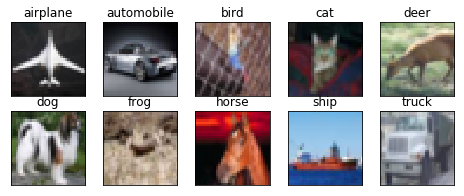

In [21]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [22]:
test_features[4]

array([[[ 65,  68,  50],
        [ 70,  81,  64],
        [ 48,  64,  46],
        ...,
        [ 51,  67,  41],
        [ 54,  76,  53],
        [ 67,  87,  66]],

       [[ 69,  80,  58],
        [ 79, 102,  81],
        [ 60,  74,  57],
        ...,
        [ 54,  66,  44],
        [ 65,  90,  69],
        [ 61,  81,  66]],

       [[ 73,  95,  72],
        [ 84, 109,  87],
        [ 72,  88,  70],
        ...,
        [ 78,  98,  75],
        [ 73,  98,  77],
        [ 48,  59,  51]],

       ...,

       [[ 95, 127,  92],
        [ 91, 123,  86],
        [ 57,  79,  45],
        ...,
        [144, 172, 108],
        [170, 201, 134],
        [122, 143,  98]],

       [[ 94, 125,  82],
        [ 75, 104,  71],
        [ 32,  52,  24],
        ...,
        [143, 181, 116],
        [154, 188, 123],
        [106, 129,  89]],

       [[ 78, 102,  65],
        [ 35,  51,  27],
        [ 24,  40,  17],
        ...,
        [143, 179, 136],
        [154, 185, 146],
        [128, 156, 117]]

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))        #
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Convolution2D(70, (3, 1), border_mode='same'))
model.add(Convolution2D(70, (1, 3), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(140, 3,3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(80, (3, 3), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(160, 3, 3,border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.35))

#model.add(Convolution2D(10, (5, 5), activation='relu'))      
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))

# add flatten layer
model.add(Flatten())

# add softmax activation function 
model.add(Activation('softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 18:51:31.518542 139712810583936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0702 18:51:31.535348 139712810583936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 18:51:31.541967 139712810583936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 18:51:31.577670 139712810583936 deprecation_wrapper.py:119] From /usr/local/lib/python3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]
W0702 18:51:36.025390 139712810583936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed

Epoch 1/100
390/390 [==============================] - 44s 113ms/step - loss: 1.4256 - acc: 0.4775 - val_loss: 1.2806 - val_acc: 0.5542
Epoch 2/100
390/390 [==============================] - 41s 106ms/step - loss: 0.9891 - acc: 0.6455 - val_loss: 1.3225 - val_acc: 0.5702
Epoch 3/100
390/390 [==============================] - 41s 105ms/step - loss: 0.8080 - acc: 0.7130 - val_loss: 1.0944 - val_acc: 0.6341
Epoch 4/100
390/390 [==============================] - 41s 106ms/step - loss: 0.7079 - acc: 0.7513 - val_loss: 1.1896 - val_acc: 0.6456
Epoch 5/100
390/390 [==============================] - 41s 105ms/step - loss: 0.6445 - acc: 0.7725 - val_loss: 0.9267 - val_acc: 0.6904
Epoch 6/100
390/390 [==============================] - 41s 106ms/step - loss: 0.5899 - acc: 0.7921 - val_loss: 0.7156 - val_acc: 0.7501
Epoch 7/100
390/390 [==============================] - 41s 105ms/step - loss: 0.5489 - acc: 0.8074 - val_loss: 0.8193 - val_acc: 0.7263
Epoch 8/100
390/390 [===========================

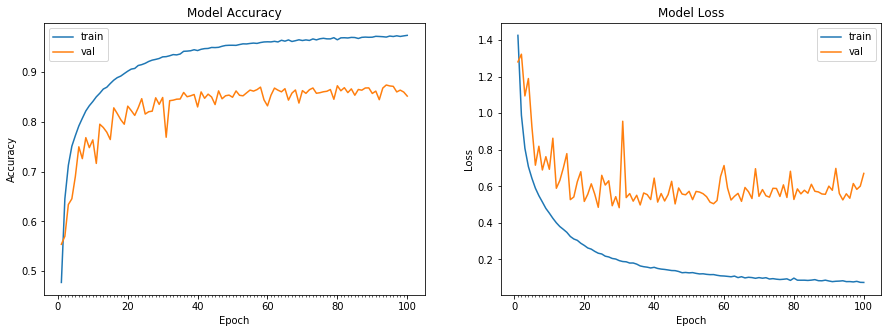

Accuracy on test data is: 85.20


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)



# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
__________

In [0]:
import cv2
from keras.preprocessing import image
import keras.backend as k
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
import sys

In [27]:
img=Image.fromarray("https://github.com/bomila/eip3/blob/master/cifar-10%20images/0.png?raw=true","RGB")
img.save("img1.jpg")

AttributeError: ignored

In [29]:
#datagen = ImageDataGenerator(zoom_range=0.0, 
                         #    horizontal_flip=False)

x=image.img_to_array("0.png")
x=np.expand_dims(x,axis=0)
x=datagen.standardize(x)

preds=model.predict(x)
class_idx=np.argmax(preds[0])
class_output=model.output[:,class_idx]
last_conv_layer=model.img=Image.fromarray("0.png","RGB")
#img.save("0.jpg")get_layer("conv2d_8")img=Image.fromarray("frog_sample_1.png","RGB")
#img.save("img1.jpg")

ValueError: ignored

In [0]:
grads=k.gradients(class_output,last_conv_layer.output)[0]
pooled_grads=k.mean(grads,axis=(0,1,2))
iterate=k.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value,conv_layer_output_value=iterate([x])


In [0]:
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


In [16]:
heatmap = np.mean(conv_layer_output_value, axis=-1)


heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(7, 7, 10)
(7, 7)


In [0]:
heatmap.shape

(7, 7)

In [0]:
from PIL import Image
img=Image.fromarray(test_features[7],"RGB")
img.save("img1.jpg")

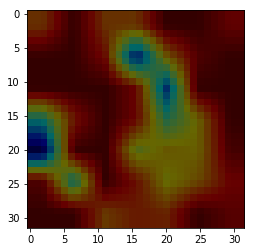

In [18]:
from google.colab.patches import cv2_imshow
img=cv2.imread("img1.jpg")
heatmap=cv2.resize(heatmap,(img.shape[1], img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
superimposed_img=cv2.addWeighted(img,0.0,heatmap,0.4,0)
plt.imshow(superimposed_img)

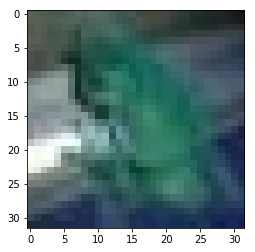

In [0]:
plt.imshow(img)

# new

In [0]:

img=Image.fromarray("frog_sample_1.png","RGB")
img.save("img1.jpg")

AttributeError: ignored

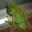

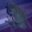

In [0]:
img = cv2.imread("img1.jpg")
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2_imshow(img)
cv2_imshow( superimposed_img)
#cv2.waitKey(0)

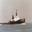

In [0]:
cv2_imshow(img)

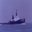

In [0]:
cv2_imshow(superimposed_img)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving frog_sample_1.png to frog_sample_1.png


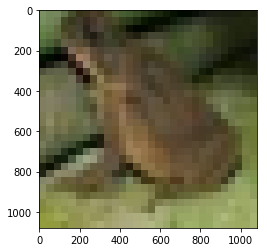

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("frog_sample_1.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()